In [8]:
from copy import deepcopy
import pandas as pd
import numpy as np

from src.features.build_features import StockTechnicals

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [9]:
# load data using MSFT 
ticker = "MSFT"
all_daily_data = pd.read_csv(f'../data/{ticker}.csv')

In [10]:
N = 26

# create a feature matrix and some labels using our handy StockTechnicals class
technicals = StockTechnicals(all_daily_data)
X = technicals.features
y = technicals.future_sma_higher_than_current_price(N)

# we don't have the last N days of data
y = y[~np.isnan(y)]
X= X[:len(y)]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, stratify=y)


/Users/ted/Library/Caches/pypoetry/virtualenvs/njit-ml-scratch-l36YVstm-py3.7/lib/python3.7/site-packages/ta/trend.py:567: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/Users/ted/Library/Caches/pypoetry/virtualenvs/njit-ml-scratch-l36YVstm-py3.7/lib/python3.7/site-packages/ta/trend.py:571: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


In [11]:
# feat_labels = X.columns
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

In [12]:
for f in range(X_train.shape[1]):
    print(f"{f + 1:2}) {X.columns[indices[f]]:<28} {round(importances[indices[f]], 4):>}")

 1) trend_visual_ichimoku_b      0.0469
 2) volume_obv                   0.0377
 3) volume_nvi                   0.0346
 4) trend_ichimoku_b             0.0268
 5) trend_visual_ichimoku_a      0.0265
 6) trend_mass_index             0.0249
 7) others_cr                    0.0241
 8) volume_adi                   0.0237
 9) trend_ema_slow               0.0226
10) trend_sma_slow               0.0217
11) momentum_kama                0.0216
12) volatility_atr               0.0209
13) trend_adx                    0.02
14) trend_kst_diff               0.02
15) volatility_bbw               0.0198
16) volatility_bbh               0.0197
17) volatility_kcw               0.0188
18) volatility_bbl               0.0182
19) trend_kst_sig                0.0182
20) volume_cmf                   0.0181
21) trend_ichimoku_a             0.018
22) trend_macd_diff              0.0177
23) trend_trix                   0.0176
24) trend_ema_fast               0.0174
25) volatility_dcl               0.0167
26) v

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

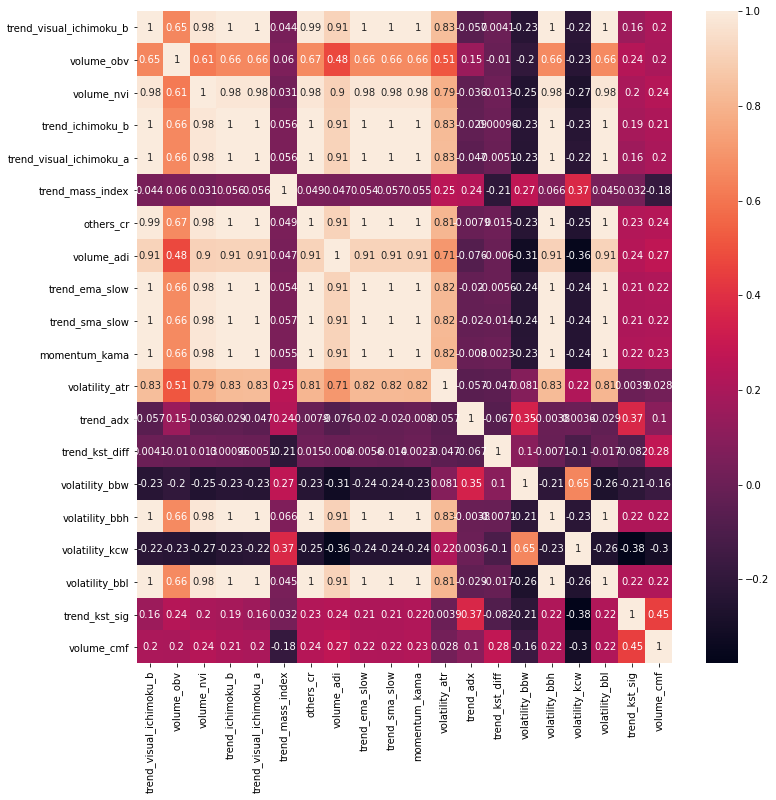

In [14]:
top_feats_X = X_train.iloc[:,indices[:20]]
df = top_feats_X.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(df, annot = True, label = ticker)

In [15]:
# top_feat_labels = top_feats.columns
top_feats_forest = RandomForestClassifier(n_estimators=500, random_state=1)
top_feats_forest.fit(top_feats_X, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

In [16]:
for f in range(top_feats_X.shape[1]):
    print(f"{f + 1:2}) {top_feats_X.columns[indices[f]]:<28} {round(importances[indices[f]], 4):>}")

IndexError: index 51 is out of bounds for axis 0 with size 20